In [5]:
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [14]:
!pip install Pandas

  Using cached pandas-2.2.2-cp310-cp310-macosx_11_0_arm64.whl (11.3 MB)
  Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)

[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [26]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 13.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.3 MB/s eta 0:00:00a 0:00:01
  Using cached pillow-10.4.0-cp310-cp310-macosx_11_0_arm64.whl (3.4 MB)

[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


**Big Data**

Definición: Big Data se refiere a conjuntos de datos extremadamente grandes y complejos que son difíciles de procesar y analizar con herramientas y métodos tradicionales.

**Hadoop**

Definición: Hadoop es un marco de software que permite almacenar y procesar grandes volúmenes de datos de manera distribuida en un clúster de computadoras.

**Apache Spark**

Definición: Apache Spark es una herramienta de procesamiento de datos en tiempo real que permite realizar análisis rápidos y eficientes en grandes volúmenes de datos, y es mucho más rápido que Hadoop para ciertos tipos de procesamiento.

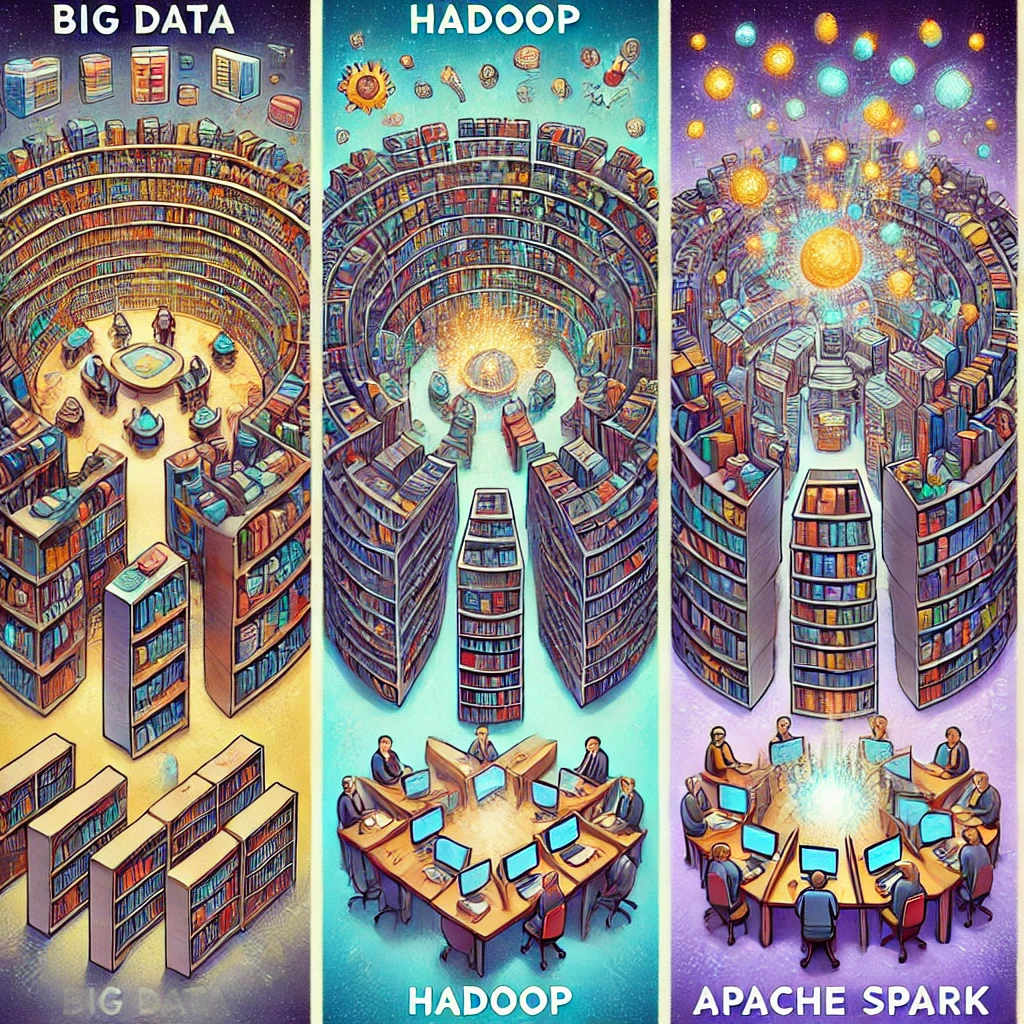

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.types import * 
from pyspark.sql.functions import * 
from pyspark.ml.regression import LinearRegression 
from pyspark.ml.feature import VectorAssembler 

In [5]:
spark = SparkSession.builder.appName('Basics').getOrCreate()

In [6]:
#Upload data and Converting Dataframe
df_pyspark = spark.read.option('header','true').csv('housing.csv', inferSchema = True)
df_pyspark.show(20)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

In [20]:
#mostrar columnas especificas
df_pyspark.select('housing_median_age').show()

+------------------+
|housing_median_age|
+------------------+
|              41.0|
|              52.0|
|              52.0|
|              52.0|
|              52.0|
|              52.0|
|              52.0|
|              42.0|
|              52.0|
|              52.0|
|              52.0|
|              52.0|
|              52.0|
|              52.0|
|              50.0|
|              52.0|
|              52.0|
|              50.0|
|              52.0|
|              40.0|
+------------------+
only showing top 20 rows



In [21]:
#mostrar columnas especificas
df_pyspark.select(['housing_median_age','total_rooms']).show()

+------------------+-----------+
|housing_median_age|total_rooms|
+------------------+-----------+
|              41.0|      880.0|
|              52.0|     1467.0|
|              52.0|     1274.0|
|              52.0|     1627.0|
|              52.0|      919.0|
|              52.0|     2535.0|
|              52.0|     3104.0|
|              42.0|     2555.0|
|              52.0|     3549.0|
|              52.0|     2202.0|
|              52.0|     3503.0|
|              52.0|     2491.0|
|              52.0|      696.0|
|              52.0|     2643.0|
|              50.0|     1120.0|
|              52.0|     1966.0|
|              52.0|     1228.0|
|              50.0|     2239.0|
|              52.0|     1503.0|
|              40.0|      751.0|
+------------------+-----------+
only showing top 20 rows



In [22]:
df=df_pyspark

In [30]:
#agregar una columna
df.withColumn('total2', df['total_rooms']*2).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|total2|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|1760.0|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|2934.0|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|2548.0|
|  -122.25|   37.85|              52.0|     1627.0|         280.0|     565.0|     259.0|       3.8462|          342200.0|       NE

In [32]:
df.withColumnRenamed('latitude','total3').show()

+---------+------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|total3|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23| 37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.24| 37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25| 37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25| 37.85|              52.0|     1627.0|         280.0|     565.0|     259.0|       3.8462|          342200.0|       NEAR BAY|
|  -122.25| 37.85|              52.0|      919.0

In [28]:
df.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1627.0|         280.0|     565.0|     259.0|       3.8462|          342200.0|       NEAR BAY|
|  -122.25|   37.85|              

# Crear una vista y hacer consultas

In [40]:
df.createOrReplaceGlobalTempView('Housing')

In [63]:
#poder consultar sql con spark
results = spark.sql("SELECT * FROM global_temp.Housing WHERE housing_median_age = 50")


In [64]:
results.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.26|   37.85|              50.0|     1120.0|         283.0|     697.0|     264.0|        2.125|          140000.0|       NEAR BAY|
|  -122.26|   37.84|              50.0|     2239.0|         455.0|     990.0|     419.0|       1.9911|          158700.0|       NEAR BAY|
|  -122.28|   37.84|              50.0|     2082.0|         492.0|    1131.0|     473.0|       1.6424|          108900.0|       NEAR BAY|
|  -122.26|   37.83|              50.0|     1125.0|         322.0|     616.0|     304.0|        2.026|          142500.0|       NEAR BAY|
|  -122.29|   37.81|              

In [65]:
df.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = false)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- ocean_proximity: string (nullable = true)



In [68]:
from pyspark.sql.functions import col

# Filtro usando la API de PySpark
df.filter(col('housing_median_age') > 50).show()


+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1627.0|         280.0|     565.0|     259.0|       3.8462|          342200.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|      919.0|         213.0|     413.0|     193.0|       4.0368|          269700.0|       NEAR BAY|
|  -122.25|   37.84|              

In [69]:
df.filter('housing_median_age >50').show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1627.0|         280.0|     565.0|     259.0|       3.8462|          342200.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|      919.0|         213.0|     413.0|     193.0|       4.0368|          269700.0|       NEAR BAY|
|  -122.25|   37.84|              

In [70]:
df.filter((df['housing_median_age'] >50)&(df['total_bedrooms'] >500)).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.25|   37.84|              52.0|     3104.0|         687.0|    1157.0|     647.0|         3.12|          241400.0|       NEAR BAY|
|  -122.25|   37.84|              52.0|     3549.0|         707.0|    1551.0|     714.0|       3.6912|          261100.0|       NEAR BAY|
|  -122.26|   37.85|              52.0|     3503.0|         752.0|    1504.0|     734.0|       3.2705|          241800.0|       NEAR BAY|
|  -122.26|   37.85|              52.0|     2643.0|         626.0|    1212.0|     620.0|       1.9167|          159200.0|       NEAR BAY|
|  -122.27|   37.84|              

In [72]:
result2=df.filter((df['housing_median_age'] >50)&(df['total_bedrooms'] >500)).collect()

In [73]:
row = result2[0]

In [76]:
row.asDict()['total_rooms']

3104.0

# Groupby and aggregate funtions

In [77]:
df.groupby('housing_median_age')

GroupedData[grouping expressions: [housing_median_age], value: [longitude: double, latitude: double ... 8 more fields], type: GroupBy]

In [79]:
df.groupby('housing_median_age').mean().show()

+------------------+-------------------+------------------+-----------------------+------------------+-------------------+------------------+------------------+------------------+-----------------------+
|housing_median_age|     avg(longitude)|     avg(latitude)|avg(housing_median_age)|  avg(total_rooms)|avg(total_bedrooms)|   avg(population)|   avg(households)|avg(median_income)|avg(median_house_value)|
+------------------+-------------------+------------------+-----------------------+------------------+-------------------+------------------+------------------+------------------+-----------------------+
|               8.0|-119.33304093567246| 35.76929824561404|                    8.0| 2631.970760233918|  534.0737523836999|1381.3567251461989| 482.5672514619883| 4.435552046783626|     195049.14619883042|
|               7.0|-119.22052631578958| 35.72885964912279|                    7.0|  2925.40350877193|  565.6041276538383| 1501.842105263158| 519.4035087719299| 4.293409649122808|     

In [80]:
df.agg({'population':'max'}).show()

+---------------+
|max(population)|
+---------------+
|         8733.0|
+---------------+



In [82]:
from pyspark.sql.functions import avg,stddev,countDistinct

In [83]:
df.select(avg('population').alias('average population')).show()

+------------------+
|average population|
+------------------+
| 1244.652888291826|
+------------------+



In [ ]:
from pyspark.sql.functions import format_number

In [85]:
population_std = df.select(stddev('population').alias('std population'))

In [87]:
population_std.select(format_number('std population',2)).show()

+--------------------------------+
|format_number(std population, 2)|
+--------------------------------+
|                          711.70|
+--------------------------------+



In [89]:
df.orderBy('population').show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -118.44|   34.04|              16.0|       18.0|           6.0|       3.0|       4.0|        0.536|          350000.0|      <1H OCEAN|
|  -114.62|   33.62|              26.0|       18.0|           3.0|       5.0|       3.0|        0.536|          275000.0|         INLAND|
|  -117.79|   35.21|               4.0|        2.0|           2.0|       6.0|       2.0|        2.375|          137500.0|         INLAND|
|  -117.76|   35.22|               4.0|       18.0|           3.0|       8.0|       6.0|        1.625|          275000.0|         INLAND|
|  -116.95|   33.86|              

In [90]:
df.orderBy(df['population'].desc()).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -118.59|   34.47|               5.0|      538.0|          98.0|    8733.0|     105.0|       4.2391|          154600.0|         INLAND|
|  -121.98|   38.32|              45.0|       19.0|           5.0|    7460.0|       6.0|      10.2264|          137500.0|         INLAND|
|   -118.3|   34.07|              46.0|     5677.0|        2610.0|    7443.0|    2406.0|       1.8238|          237500.0|      <1H OCEAN|
|  -122.17|   37.43|              24.0|     3924.0|        1142.0|    7174.0|     950.0|       4.0972|          387500.0|     NEAR OCEAN|
|  -118.29|   34.06|              

In [92]:
#nulos
df.na.drop(thresh=2,how='all').show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1627.0|         280.0|     565.0|     259.0|       3.8462|          342200.0|       NEAR BAY|
|  -122.25|   37.85|              

In [93]:
df.na.fill(0,subset=['total_bedrooms']).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1627.0|         280.0|     565.0|     259.0|       3.8462|          342200.0|       NEAR BAY|
|  -122.25|   37.85|              

Recuento de filas y descripción del uso para comprender los datos

In [4]:
#Recuento de filas
df_pyspark.count()

20640

In [5]:
##Tratando de entender nuestros datos con Describe.show()
df_pyspark.describe().show()

24/08/22 21:54:33 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------+
|summary|          longitude|         latitude|housing_median_age|       total_rooms|    total_bedrooms|        population|       households|     median_income|median_house_value|ocean_proximity|
+-------+-------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------+
|  count|              20640|            20640|             20640|             20640|             20433|             20640|            20640|             20640|             20640|          20640|
|   mean|-119.56970445736148| 35.6318614341087|28.639486434108527|2635.7630813953488| 537.8705525375618|1425.4767441860465|499.5396802325581|3.8706710029070246|206855.81690891474|           NULL|
| stddev|  2.0035317

In [6]:
spark.conf.set("spark.sql.debug.maxToStringFields", "1000")

In [7]:
##Tratando de entender nuestros datos con Describe.show()
df_pyspark.describe().show()

+-------+-------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------+
|summary|          longitude|         latitude|housing_median_age|       total_rooms|    total_bedrooms|        population|       households|     median_income|median_house_value|ocean_proximity|
+-------+-------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+---------------+
|  count|              20640|            20640|             20640|             20640|             20433|             20640|            20640|             20640|             20640|          20640|
|   mean|-119.56970445736148| 35.6318614341087|28.639486434108527|2635.7630813953488| 537.8705525375618|1425.4767441860465|499.5396802325581|3.8706710029070246|206855.81690891474|           NULL|
| stddev|  2.0035317

In [8]:
pd_df = df_pyspark.describe().toPandas()
pd_df


,summary,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,count,20640,20640,20640,20640,20433,20640,20640,20640,20640,20640
1,mean,-119.56970445736148,35.6318614341087,28.639486434108527,2635.7630813953488,537.8705525375618,1425.4767441860465,499.5396802325581,3.8706710029070246,206855.81690891474,None
2,stddev,2.003531723502584,2.135952397457101,12.58555761211163,2181.6152515827944,421.38507007403115,1132.46212176534,382.3297528316098,1.899821717945263,115395.61587441359,None
3,min,-124.35,32.54,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0,<1H OCEAN
4,max,-114.31,41.95,52.0,39320.0,6445.0,35682.0,6082.0,15.0001,500001.0,NEAR OCEAN


In [9]:
df_pandas = df_pyspark.describe().toPandas()
display(df_pandas)

,summary,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,count,20640,20640,20640,20640,20433,20640,20640,20640,20640,20640
1,mean,-119.56970445736148,35.6318614341087,28.639486434108527,2635.7630813953488,537.8705525375618,1425.4767441860465,499.5396802325581,3.8706710029070246,206855.81690891474,None
2,stddev,2.003531723502584,2.135952397457101,12.58555761211163,2181.6152515827944,421.38507007403115,1132.46212176534,382.3297528316098,1.899821717945263,115395.61587441359,None
3,min,-124.35,32.54,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0,<1H OCEAN
4,max,-114.31,41.95,52.0,39320.0,6445.0,35682.0,6082.0,15.0001,500001.0,NEAR OCEAN


In [10]:
from IPython.display import display, HTML
display(HTML(df_pandas.to_html()))

,summary,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,count,20640,20640,20640,20640,20433,20640,20640,20640,20640,20640
1,mean,-119.56970445736148,35.6318614341087,28.639486434108527,2635.7630813953488,537.8705525375618,1425.4767441860465,499.5396802325581,3.8706710029070246,206855.81690891474,None
2,stddev,2.003531723502584,2.135952397457101,12.58555761211163,2181.6152515827944,421.38507007403115,1132.46212176534,382.3297528316098,1.899821717945263,115395.61587441359,None
3,min,-124.35,32.54,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0,<1H OCEAN
4,max,-114.31,41.95,52.0,39320.0,6445.0,35682.0,6082.0,15.0001,500001.0,NEAR OCEAN


# Ver valores nulos en cada columna

In [11]:
#Escribimos un bucle para ver lso valores faltantes
for colu in df_pyspark.columns:
    miss = df_pyspark.filter(col(colu).isNull()).count()
    print(f"{colu} columns {miss} has missing value.")

longitude columns 0 has missing value.
latitude columns 0 has missing value.
housing_median_age columns 0 has missing value.
total_rooms columns 0 has missing value.
total_bedrooms columns 207 has missing value.
population columns 0 has missing value.
households columns 0 has missing value.
median_income columns 0 has missing value.
median_house_value columns 0 has missing value.
ocean_proximity columns 0 has missing value.


# Llenar valores nulos con mediana

In [12]:
#Filling missing values with median at total_Bedrooms
mean_bedroom = df_pyspark.select(mean(df_pyspark['total_bedrooms'])).collect()[0][0]
df_pyspark = df_pyspark.na.fill({'total_bedrooms': mean_bedroom})
#controlling function has any missing value
df_pyspark.filter(col("total_bedrooms").isNull()).count()

0

# Outlier para el total de cuartos

In [13]:
#For Outlier 

# IQR calculation
Q1 = df_pyspark.approxQuantile("total_rooms", [0.25], 0)[0]
Q3 = df_pyspark.approxQuantile("total_rooms", [0.75], 0)[0]
IQR = Q3 - Q1

# Lower and Upper Limit Calculation
lower = Q1 - 1.5 * IQR
upper= Q3 + 1.5 * IQR

# Outlier Filtering with Filter function
df_pyspark = df_pyspark.filter((col("total_rooms") >= lit(lower)) & (col("total_rooms") <= lit(upper)))
df_pyspark.count()

19354

# Train and Test Data Split

In [14]:
#Data Split
splits = df_pyspark.randomSplit([0.8, 0.2]) 
train = splits[0] 
test = splits[1] 
train_rows = train.count() 
test_rows = test.count() 
print("Training Rows:", train_rows, " Testing Rows:", test_rows) 

Training Rows: 15528  Testing Rows: 3826


# Vectorización de Características y Etiquetado de la Variable Objetivo
Este código está diseñado para preparar un conjunto de datos en PySpark para su uso en modelos de machine learning. Primero, se convierte una columna categórica (ocean_proximity) en valores numéricos utilizando StringIndexer. Luego, se utiliza VectorAssembler para combinar varias columnas numéricas en un único vector de características (features). Finalmente, la columna que se desea predecir (median_house_value) se convierte en la etiqueta (label), renombrándola y convirtiéndola a un tipo de dato entero. El resultado es un DataFrame listo para entrenar un modelo predictivo, donde features representa las entradas del modelo y label la salida que se intenta predecir.

In [15]:
from pyspark.ml.feature import StringIndexer 
from pyspark.ml.feature import VectorAssembler

# StringIndexer ile 'ocean_proximity' label to numeric
stringIndexer = StringIndexer(inputCol="ocean_proximity", outputCol="ocean_proximity_idx")
stringIndexerModel = stringIndexer.fit(train)  # Ftting Traing
train_transformed = stringIndexerModel.transform(train)  # Transform

# VectorAssembler
assembler = VectorAssembler(
    inputCols=["ocean_proximity_idx", "longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"],
    outputCol="features"
)

# Training Taret is Median_Hause_value
training = assembler.transform(train_transformed).select(col("features"), (col("median_house_value").cast("Int").alias("label")))
training.show()

+--------------------+------+
|            features| label|
+--------------------+------+
|[2.0,-124.35,40.5...| 94600|
|[2.0,-124.3,41.8,...| 85800|
|[2.0,-124.3,41.84...|103600|
|[2.0,-124.27,40.6...| 79000|
|[2.0,-124.26,40.5...|111400|
|[2.0,-124.25,40.2...| 76100|
|[2.0,-124.23,40.5...|106700|
|[2.0,-124.23,40.8...| 50800|
|[2.0,-124.23,41.7...| 73200|
|[2.0,-124.21,41.7...| 66900|
|[2.0,-124.21,41.7...| 68400|
|[2.0,-124.19,40.7...| 90100|
|[2.0,-124.19,40.7...| 69000|
|[2.0,-124.19,41.7...| 74600|
|[2.0,-124.18,40.7...| 72200|
|[2.0,-124.18,40.7...| 67000|
|[2.0,-124.18,40.7...| 70200|
|[2.0,-124.18,40.7...| 70500|
|[2.0,-124.17,40.6...| 86400|
|[2.0,-124.17,40.7...|128900|
+--------------------+------+
only showing top 20 rows



Proceso Matemático de VectorAssembler

Imagina que tienes un conjunto de datos con varias columnas numéricas. Supongamos que estás trabajando con tres columnas en particular: longitude, latitude y housing_median_age. Los valores de una fila específica de estas columnas podrían ser algo como:

longitude: -122.23
latitude: 37.88
housing_median_age: 41
1. ¿Qué es un vector?
   
Un vector es simplemente una lista ordenada de números. En matemáticas, se representa como un conjunto de valores encerrado entre paréntesis o corchetes, por ejemplo, (x, y, z).

Para nuestra fila de datos, si tomamos los valores de las tres columnas mencionadas, el vector correspondiente sería:

vector
=
(
−
122.23
,
37.88
,
41
)

vector=(−122.23,37.88,41)

2. ¿Qué hace VectorAssembler?
   
El VectorAssembler toma los valores de diferentes columnas y los coloca en un vector. Este vector se convierte en una única columna en el DataFrame, llamada normalmente features.

Supongamos que tenemos más columnas, por ejemplo:

total_rooms: 880

median_income: 8.3252

Si incluimos estas columnas también, el vector para esa fila sería:

vector
=
(
−
122.23
,
37.88
,
41
,
880
,
8.3252
)
vector=(−122.23,37.88,41,880,8.3252)

Matemáticamente, VectorAssembler realiza lo siguiente:

Selecciona los valores de cada columna: Toma los valores de las columnas especificadas.
Agrupa los valores en un vector: Los coloca en un orden específico para crear un vector.

3. Ejemplo concreto
   
Dado un DataFrame con estas columnas:

longitude	latitude	housing_median_age	total_rooms	median_income
-122.23	37.88	41	880	8.3252
Si se aplica VectorAssembler a estas columnas, se genera un vector que contiene todos estos valores:

features
=
(
−
122.23
,
37.88
,
41
,
880
,
8.3252
)
features=(−122.23,37.88,41,880,8.3252)

Este vector representa una sola fila de datos en un formato que un modelo de Machine Learning puede utilizar directamente.

Resumen Final

Matemáticamente, lo que VectorAssembler hace es tomar varios números individuales de diferentes columnas y organizarlos en un vector (una lista ordenada). Este vector es lo que se utiliza para entrenar el modelo. Es una forma de empaquetar toda la información relevante en una estructura única y ordenada que los algoritmos de Machine Learning pueden procesar fácilmente.m

## Se usa un ensamblador nuevamente para indexar las etiquetas en los datos de prueba y concatenarlas en una sola fila.

In [16]:
# 
test_transformed = stringIndexerModel.transform(test)
testing = assembler.transform(test_transformed).select(
    "features", 
    (col("median_house_value").cast("Int").alias("trueLabel"))
)

testing.show()

+--------------------+---------+
|            features|trueLabel|
+--------------------+---------+
|[2.0,-124.22,41.7...|    78300|
|[2.0,-124.21,40.7...|    58100|
|[2.0,-124.19,40.7...|    70000|
|[2.0,-124.18,40.6...|   107000|
|[2.0,-124.18,40.7...|    64600|
|[2.0,-124.17,40.7...|   116100|
|[2.0,-124.17,40.8...|    60000|
|[2.0,-124.17,40.8...|    62500|
|[2.0,-124.17,41.8...|   109400|
|[2.0,-124.16,40.6...|    85100|
|[2.0,-124.16,40.7...|    82000|
|[2.0,-124.16,40.7...|    92700|
|[2.0,-124.16,40.8...|    80500|
|[2.0,-124.16,41.7...|    69500|
|[2.0,-124.15,40.7...|   100600|
|[2.0,-124.15,40.7...|    90000|
|[2.0,-124.15,40.8...|    57500|
|[2.0,-124.14,40.7...|    99600|
|[2.0,-124.14,40.7...|    92800|
|[2.0,-124.13,40.7...|    83000|
+--------------------+---------+
only showing top 20 rows



# Linear Regression Machine Learning and Performance Metrics

In [17]:
#Linear Regresion Model
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol="features", labelCol="label")
lrModel = lr.fit(training)
lrPredictions = lrModel.transform(testing)

# Performans Metric
evaluator = RegressionEvaluator(labelCol="trueLabel", predictionCol="prediction")
lrRmse = evaluator.evaluate(lrPredictions, {evaluator.metricName: "rmse"})
lrMae = evaluator.evaluate(lrPredictions, {evaluator.metricName: "mae"})
lrR2 = evaluator.evaluate(lrPredictions, {evaluator.metricName: "r2"})
print(f"Linear Regression - RMSE: {lrRmse}")
print(f"Linear Regression - MAE: {lrMae}")
print(f"Linear Regression - R^2: {lrR2}")

24/08/22 21:54:53 WARN Instrumentation: [8779cded] regParam is zero, which might cause numerical instability and overfitting.
24/08/22 21:54:53 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/08/22 21:54:53 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


Linear Regression - RMSE: 69165.56702045065
Linear Regression - MAE: 50800.09168388292
Linear Regression - R^2: 0.644786564708691


 - Esta métrica indica qué tan bien se ajustan las predicciones del modelo a los datos observados. Un R² de aproximadamente 0.622 significa que el modelo explica el 62.2% de la variabilidad en la variable dependiente. 
 - El RMSE y el MAE sugieren que hay una desviación considerable entre las predicciones y los valores reales, con un error promedio en torno a los 50,910 y un error cuadrático medio de alrededor de 69,771

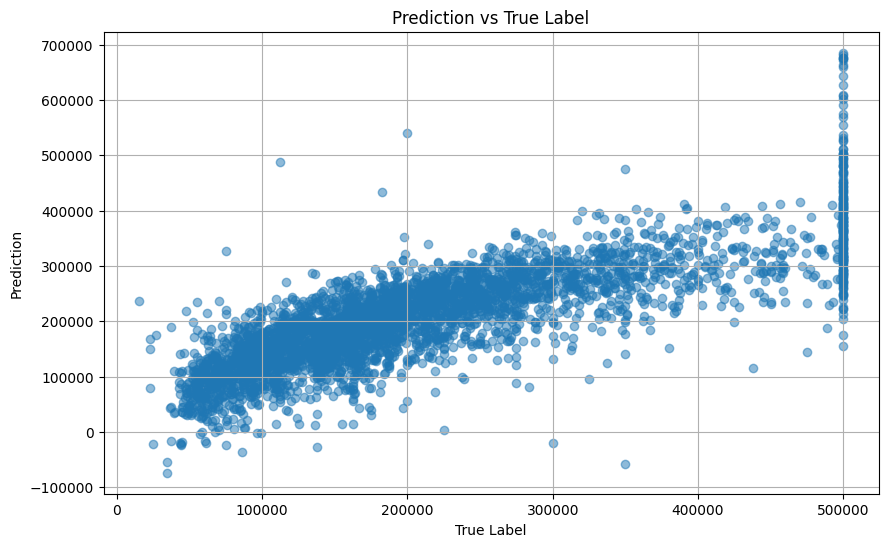

In [18]:
import matplotlib.pyplot as plt

# Pandas DataFrame
df = lrPredictions.select("prediction", "trueLabel").toPandas()
# Graph for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(df['trueLabel'], df['prediction'], alpha=0.5)
plt.xlabel('True Label')
plt.ylabel('Prediction')
plt.title('Prediction vs True Label')
plt.grid(True)
plt.show()

Interpretación:
Tendencia General:

Existe una tendencia general en la que las predicciones (en el eje y) siguen la línea de los valores verdaderos (en el eje x). Esto sugiere que el modelo está capturando cierta relación entre las características y la variable objetivo. Idealmente, todos los puntos deberían estar alineados en una diagonal recta desde el origen (0,0), lo que indicaría que las predicciones son exactamente iguales a los valores verdaderos.
Dispersión:

Sin embargo, hay una notable dispersión alrededor de la línea diagonal, lo que indica que el modelo tiene errores en sus predicciones. Esto es consistente con los valores de RMSE y MAE que observaste previamente, que también sugieren que el modelo no es perfecto.
Valores Extremos y Outliers:

Hay puntos por debajo de 0 en el eje y, lo que indica que el modelo está prediciendo valores negativos para la variable objetivo, lo cual podría no tener sentido dependiendo del contexto (por ejemplo, si estás prediciendo precios de casas, un valor negativo no es válido).
También hay una concentración de puntos a lo largo del borde derecho de la gráfica (cerca de 500,000 en el eje x). Esto podría sugerir que el modelo tiene dificultades para predecir correctamente para estos valores altos de la variable objetivo.
Predicciones en el Límite Superior:

La acumulación de puntos en el valor máximo del eje x (500,000) y la dispersión de valores en el eje y sugiere que el modelo puede estar alcanzando un límite en la predicción para estos valores extremos, y es probable que esté subestimando o sobreestimando significativamente.
Resumen:
Precisión General: El modelo capta la tendencia general, pero hay errores significativos, especialmente en los extremos.
Posibles Problemas: La dispersión en las predicciones y los valores negativos indican que el modelo podría necesitar ajustes adicionales, como una mejor selección de características, regularización o incluso considerar otro tipo de modelo si los errores persisten.